In [103]:
import pandas as pd

In [104]:
bank_data = pd.read_csv("bank_data.csv")
bank_data.info()
bank_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           600 non-null    int64  
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 56.4+ KB


,ID,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,1,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,2,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,3,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,4,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,5,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [105]:
# Kiểm tra số lượng hàng trùng lặp
duplicate_rows = bank_data.duplicated().sum()
print("Số lượng hàng trùng lặp:", duplicate_rows)

Số lượng hàng trùng lặp: 0


In [106]:
missing_values = bank_data.isnull().sum()
print("Số lượng giá trị thiếu của mỗi cột:\n", missing_values)

Số lượng giá trị thiếu của mỗi cột:
 ID             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64


In [107]:
basic_stats = bank_data[['age', 'income', 'children']].describe()
print(basic_stats)

              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000


In [108]:
# Tính thu nhập trung bình cho từng khu vực và giới tính
income_by_region_sex = bank_data.groupby(['region', 'sex'])['income'].mean()
print("Thu nhập trung bình theo khu vực và giới tính:")
print(income_by_region_sex)

Thu nhập trung bình theo khu vực và giới tính:
region      sex   
INNER_CITY  FEMALE    27166.216031
            MALE      26538.128188
RURAL       FEMALE    31366.274468
            MALE      28743.575918
SUBURBAN    FEMALE    28573.271667
            MALE      28734.249375
TOWN        FEMALE    26730.686087
            MALE      26849.572469
Name: income, dtype: float64


In [109]:
# Đếm số lượng và tính phần trăm cho các biến phân loại
car_count = bank_data['car'].value_counts(normalize=True) * 100
save_act_count = bank_data['save_act'].value_counts(normalize=True) * 100
pep_count = bank_data['pep'].value_counts(normalize=True) * 100

print("Phần trăm khách hàng sở hữu xe:")
print(car_count)
print("\nPhần trăm khách hàng có tài khoản tiết kiệm:")
print(save_act_count)
print("\nPhần trăm khách hàng tham gia PEP:")
print(pep_count)


Phần trăm khách hàng sở hữu xe:
car
NO     50.666667
YES    49.333333
Name: proportion, dtype: float64

Phần trăm khách hàng có tài khoản tiết kiệm:
save_act
YES    69.0
NO     31.0
Name: proportion, dtype: float64

Phần trăm khách hàng tham gia PEP:
pep
NO     54.333333
YES    45.666667
Name: proportion, dtype: float64


In [110]:
# Tính phương sai và độ lệch chuẩn của thu nhập theo tình trạng hôn nhân
income_variance_married = bank_data.groupby('married')['income'].var()
income_stddev_married = bank_data.groupby('married')['income'].std()

print("Phương sai thu nhập theo tình trạng hôn nhân:")
print(income_variance_married)
print("\nĐộ lệch chuẩn thu nhập theo tình trạng hôn nhân:")
print(income_stddev_married)


Phương sai thu nhập theo tình trạng hôn nhân:
married
NO     1.793261e+08
YES    1.601548e+08
Name: income, dtype: float64

Độ lệch chuẩn thu nhập theo tình trạng hôn nhân:
married
NO     13391.270334
YES    12655.229551
Name: income, dtype: float64


In [111]:
# Phân tích độ tuổi trung bình của khách hàng có và không có con
age_children_stats = bank_data.groupby('children')['age'].mean()
children_count = bank_data['children'].value_counts()

print("Độ tuổi trung bình của khách hàng theo số con:")
print(age_children_stats)
print("\nSố lượng khách hàng theo số con:")
print(children_count)


Độ tuổi trung bình của khách hàng theo số con:
children
0    41.969582
1    42.681481
2    42.716418
3    42.838235
Name: age, dtype: float64

Số lượng khách hàng theo số con:
children
0    263
1    135
2    134
3     68
Name: count, dtype: int64


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

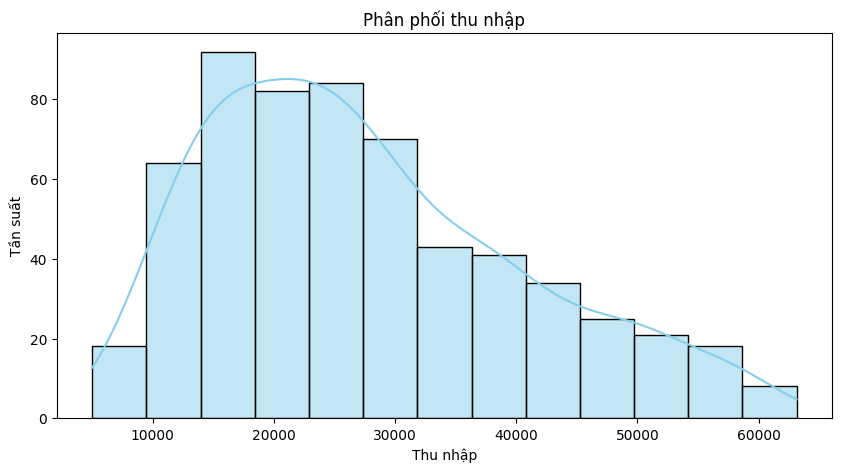

In [113]:
# Biểu đồ phân phối thu nhập
plt.figure(figsize=(10, 5))
sns.histplot(bank_data['income'], kde=True, color='skyblue')
plt.title('Phân phối thu nhập')
plt.xlabel('Thu nhập')
plt.ylabel('Tần suất')
plt.show()

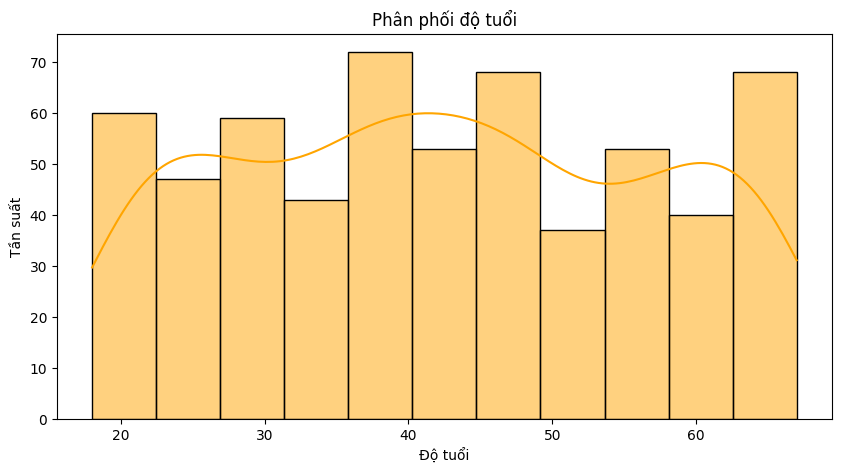

In [114]:
# Biểu đồ phân phối độ tuổi
plt.figure(figsize=(10, 5))
sns.histplot(bank_data['age'], kde=True, color='orange')
plt.title('Phân phối độ tuổi')
plt.xlabel('Độ tuổi')
plt.ylabel('Tần suất')
plt.show()

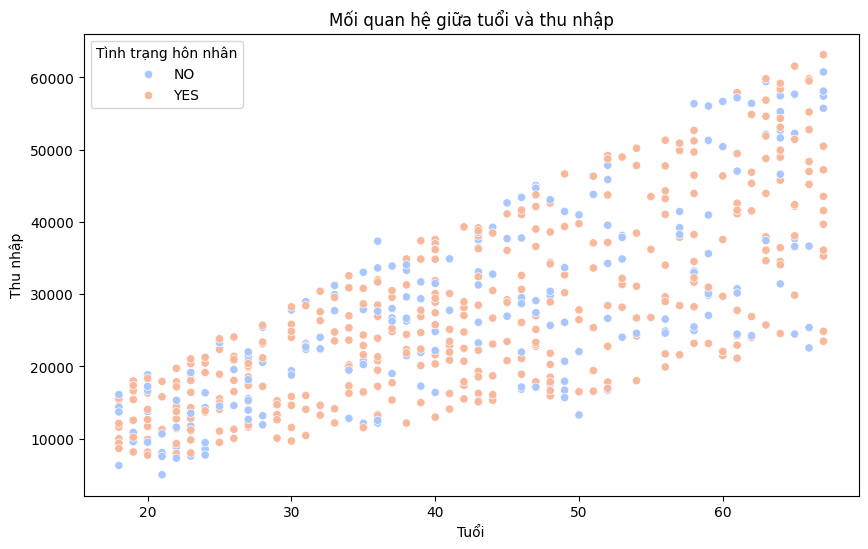

In [115]:
# Biểu đồ phân tán cho mối quan hệ giữa tuổi và thu nhập
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=bank_data, hue='married', palette='coolwarm')
plt.title('Mối quan hệ giữa tuổi và thu nhập')
plt.xlabel('Tuổi')
plt.ylabel('Thu nhập')
plt.legend(title='Tình trạng hôn nhân')
plt.show()


In [116]:
# Đổi dữ liệu từ dạng định danh (object) về dạng số
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
bank_data["sex"] = lb_make.fit_transform(bank_data["sex"])
bank_data["region"] = lb_make.fit_transform(bank_data["region"])
bank_data["married"] = lb_make.fit_transform(bank_data["married"])
bank_data["car"] = lb_make.fit_transform(bank_data["car"])
bank_data["save_act"] = lb_make.fit_transform(bank_data["save_act"])
bank_data["current_act"] = lb_make.fit_transform(bank_data["current_act"])
bank_data["mortgage"] = lb_make.fit_transform(bank_data["mortgage"])
bank_data["pep"] = lb_make.fit_transform(bank_data["pep"])
print(bank_data)

      ID  age  sex  region    income  married  children  car  save_act  \
0      1   48    0       0  17546.00        0         1    0         0   
1      2   40    1       3  30085.10        1         3    1         0   
2      3   51    0       0  16575.40        1         0    1         1   
3      4   23    0       3  20375.40        1         3    0         0   
4      5   57    0       1  50576.30        1         0    0         1   
..   ...  ...  ...     ...       ...      ...       ...  ...       ...   
595  596   61    0       0  47025.00        0         2    1         1   
596  597   30    0       0   9672.25        1         0    1         1   
597  598   31    0       3  15976.30        1         0    1         1   
598  599   29    1       0  14711.80        1         0    0         1   
599  600   38    1       3  26671.60        0         0    1         0   

     current_act  mortgage  pep  
0              0         0    1  
1              1         1    0  
2        

In [117]:
# Xác định thuộc tính mô tả X và thuộc tính dự đoán y
features = ['age','sex','region','income','married','children','car','save_act','current_act','mortgage']
target = ['pep']
X = bank_data[features]
y = bank_data[target]
print(X)
print(y)

     age  sex  region    income  married  children  car  save_act  \
0     48    0       0  17546.00        0         1    0         0   
1     40    1       3  30085.10        1         3    1         0   
2     51    0       0  16575.40        1         0    1         1   
3     23    0       3  20375.40        1         3    0         0   
4     57    0       1  50576.30        1         0    0         1   
..   ...  ...     ...       ...      ...       ...  ...       ...   
595   61    0       0  47025.00        0         2    1         1   
596   30    0       0   9672.25        1         0    1         1   
597   31    0       3  15976.30        1         0    1         1   
598   29    1       0  14711.80        1         0    0         1   
599   38    1       3  26671.60        0         0    1         0   

     current_act  mortgage  
0              0         0  
1              1         1  
2              1         0  
3              1         0  
4              0         0

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     age  sex  region   income  married  children  car  save_act  current_act  \
109   30    0       0  24031.5        1         2    1         1            1   
221   47    1       0  42124.1        1         2    0         1            1   
451   43    1       3  38540.0        0         0    1         1            0   
472   61    1       0  21139.8        1         2    1         1            0   
577   62    1       3  45342.5        1         0    1         1            0   
..   ...  ...     ...      ...      ...       ...  ...       ...          ...   
288   33    1       0  14136.5        1         1    0         1            0   
500   39    0       0  27765.8        1         3    1         1            0   
156   50    1       3  26462.5        1         0    1         1            1   
274   42    0       0  27056.5        1         0    1         1            1   
335   44    1       3  26688.1        1         1    0         1            0   

     mortgage  
109        

In [119]:
# Khai báo mô hình cây quyết định
model=tree.DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth = 3,min_samples_leaf = 5)

In [120]:
# Thực thi mô hình
model = model.fit(X_train,y_train)

In [121]:
# Kiểm thử mô hình
y_pred = model.predict(X_test)
print("Giá trị nhãn mô hình dự đoán được:\n " ,y_pred)

Giá trị nhãn mô hình dự đoán được:
  [0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 1 1 1 0 0 1 0 0 1]


In [122]:
# Xác định ma trần nhầm lẫn
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[56  7]
 [25 32]]


In [123]:
# Độ chính xác của mô hình
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  73.33333333333333


In [124]:
# Sử dụng mô hình dự đoán khả năng trả nợ của khách hàng có các thông tin sau
# age 42, sex nữ 1, region thị trấn 3, income 30527, married 1
# children 2, car 1, save_act 1, current_act 0, mortgage 1
x=[[42,1,3,30527,1,2,1,1,0,1]]
y = model.predict(x)
if y==1:
    print("Khách hàng có khả năng trả nợ")
else:
    print("Khách hàng không có khả năng trả nợ")

Khách hàng không có khả năng trả nợ


c:\Users\dotua\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
